In [80]:
import pandas as pd

In [114]:
df_1 = pd.read_csv('./training_data_08-26-2022-21-26-37.csv')
df_2 = pd.read_csv('./training_data_08-26-2022-21-26-37.csv')
df_3 = pd.read_csv('./training_data_08-26-2022-22-05-52.csv')
df_4 = pd.read_csv('./training_data_08-26-2022-22-22-01.csv')
df_5 = pd.read_csv('./training_data_08-26-2022-22-28-09.csv')
df = pd.concat([df_1, df_2, df_3, df_4, df_5])

# Analyse Data

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18714 entries, 0 to 3561
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  18714 non-null  int64  
 1   i_sensor_1  18714 non-null  int64  
 2   i_sensor_2  18714 non-null  int64  
 3   i_sensor_3  18714 non-null  int64  
 4   o_left      18714 non-null  bool   
 5   o_right     18714 non-null  bool   
 6   i_sensor_4  18714 non-null  float64
 7   i_sensor_5  18714 non-null  float64
dtypes: bool(2), float64(2), int64(4)
memory usage: 1.0 MB


<AxesSubplot:>

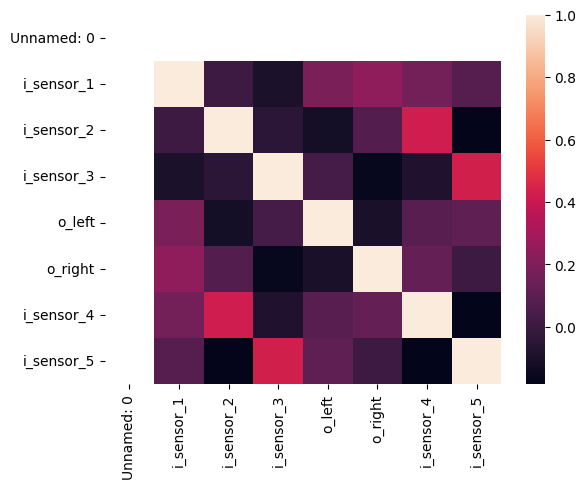

In [116]:
import seaborn as sns
sns.heatmap(df.corr())

# Scale/convert input values

In [117]:
df = df.astype({'o_left': int, 'o_right': int})   

In [118]:
df.head()

,Unnamed: 0,i_sensor_1,i_sensor_2,i_sensor_3,o_left,o_right,i_sensor_4,i_sensor_5
0,0,-1,53,41,0,0,47.0,37.0
1,0,-1,52,41,0,0,47.0,37.0
2,0,-1,52,42,0,0,47.0,37.0
3,0,-1,52,42,0,0,47.0,37.0
4,0,-1,52,43,0,0,47.0,37.0


In [119]:
df[df['o_left']==1]

,Unnamed: 0,i_sensor_1,i_sensor_2,i_sensor_3,o_left,o_right,i_sensor_4,i_sensor_5
91,0,-1,53,49,1,0,48.0,37.0
92,0,-1,51,55,1,0,47.0,39.0
98,0,-1,44,65,1,0,42.0,50.0
99,0,142,41,71,1,0,42.0,54.0
114,0,-1,43,62,1,0,37.0,54.0
...,...,...,...,...,...,...,...,...
3376,0,-1,51,49,1,0,39.0,44.0
3377,0,-1,48,51,1,0,39.0,44.0
3378,0,-1,44,55,1,0,38.0,44.0
3514,0,-1,40,48,1,0,35.0,45.0


# Set Train and test 

In [120]:
from sklearn.model_selection import train_test_split
X = df.drop(['o_left','o_right','Unnamed: 0'],axis=1).values
y = df[['o_left','o_right']].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=101)

# Create neural network

In [121]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [122]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
model = Sequential()
X_train.shape

(13099, 5)

In [123]:
model.add(Dense(units=8, input_dim=5,activation='relu'))

model.add(Dense(units=10,activation='relu'))

model.add(Dense(units=10,activation='relu'))

model.add(Dense(units=10,activation='relu'))

model.add(Dense(2,activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model

In [124]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=5000,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/5000
410/410 [==============================] - 1s 1ms/step - loss: 0.3393 - accuracy: 0.2329 - val_loss: 0.2790 - val_accuracy: 0.2119
Epoch 2/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.2780 - accuracy: 0.1754 - val_loss: 0.2838 - val_accuracy: 0.1517
Epoch 3/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.2745 - accuracy: 0.1773 - val_loss: 0.2684 - val_accuracy: 0.1565
Epoch 4/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.2709 - accuracy: 0.1631 - val_loss: 0.2712 - val_accuracy: 0.1498
Epoch 5/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.2683 - accuracy: 0.1726 - val_loss: 0.2658 - val_accuracy: 0.1626
Epoch 6/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.2666 - accuracy: 0.1656 - val_loss: 0.2666 - val_accuracy: 0.1628
Epoch 7/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.2650 - accuracy: 0.1697 - val_loss: 0.2625 - val_accuracy:

410/410 [==============================] - 0s 1ms/step - loss: 0.2155 - accuracy: 0.2621 - val_loss: 0.2422 - val_accuracy: 0.2468
Epoch 114/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.2150 - accuracy: 0.2529 - val_loss: 0.2420 - val_accuracy: 0.2504
Epoch 115/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.2137 - accuracy: 0.2641 - val_loss: 0.2400 - val_accuracy: 0.2703
Epoch 116/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.2151 - accuracy: 0.2583 - val_loss: 0.2432 - val_accuracy: 0.2714
Epoch 117/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.2118 - accuracy: 0.2601 - val_loss: 0.2407 - val_accuracy: 0.2579
Epoch 118/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.2155 - accuracy: 0.2577 - val_loss: 0.2379 - val_accuracy: 0.3056
Epoch 119/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.2134 - accuracy: 0.2805 - val_loss: 0.2402 - val_accuracy: 

410/410 [==============================] - 0s 1ms/step - loss: 0.1965 - accuracy: 0.3100 - val_loss: 0.2491 - val_accuracy: 0.4016
Epoch 226/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1928 - accuracy: 0.3280 - val_loss: 0.2534 - val_accuracy: 0.2858
Epoch 227/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1981 - accuracy: 0.3151 - val_loss: 0.2470 - val_accuracy: 0.4351
Epoch 228/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1958 - accuracy: 0.3566 - val_loss: 0.2514 - val_accuracy: 0.2435
Epoch 229/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1949 - accuracy: 0.3119 - val_loss: 0.2586 - val_accuracy: 0.2787
Epoch 230/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1929 - accuracy: 0.3132 - val_loss: 0.2598 - val_accuracy: 0.2837
Epoch 231/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1977 - accuracy: 0.3238 - val_loss: 0.2528 - val_accuracy: 

410/410 [==============================] - 0s 1ms/step - loss: 0.1783 - accuracy: 0.3898 - val_loss: 0.2637 - val_accuracy: 0.3938
Epoch 338/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1785 - accuracy: 0.3982 - val_loss: 0.2648 - val_accuracy: 0.3159
Epoch 339/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1801 - accuracy: 0.3890 - val_loss: 0.2651 - val_accuracy: 0.4684
Epoch 340/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1830 - accuracy: 0.4098 - val_loss: 0.2588 - val_accuracy: 0.3640
Epoch 341/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1824 - accuracy: 0.3941 - val_loss: 0.2606 - val_accuracy: 0.3124
Epoch 342/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1827 - accuracy: 0.4020 - val_loss: 0.2483 - val_accuracy: 0.3706
Epoch 343/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1793 - accuracy: 0.4168 - val_loss: 0.2728 - val_accuracy: 

410/410 [==============================] - 0s 1ms/step - loss: 0.1733 - accuracy: 0.4135 - val_loss: 0.2811 - val_accuracy: 0.4251
Epoch 450/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1666 - accuracy: 0.4365 - val_loss: 0.2830 - val_accuracy: 0.3785
Epoch 451/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1747 - accuracy: 0.4131 - val_loss: 0.2755 - val_accuracy: 0.3863
Epoch 452/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1696 - accuracy: 0.4223 - val_loss: 0.2752 - val_accuracy: 0.4281
Epoch 453/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1784 - accuracy: 0.4216 - val_loss: 0.2860 - val_accuracy: 0.3736
Epoch 454/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1694 - accuracy: 0.4279 - val_loss: 0.2738 - val_accuracy: 0.4566
Epoch 455/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1643 - accuracy: 0.4422 - val_loss: 0.2832 - val_accuracy: 

410/410 [==============================] - 0s 1ms/step - loss: 0.1739 - accuracy: 0.4238 - val_loss: 0.2906 - val_accuracy: 0.3701
Epoch 562/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1665 - accuracy: 0.4282 - val_loss: 0.2989 - val_accuracy: 0.3980
Epoch 563/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1600 - accuracy: 0.4439 - val_loss: 0.2870 - val_accuracy: 0.4262
Epoch 564/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1615 - accuracy: 0.4473 - val_loss: 0.2931 - val_accuracy: 0.3275
Epoch 565/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1680 - accuracy: 0.4326 - val_loss: 0.2986 - val_accuracy: 0.3861
Epoch 566/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1589 - accuracy: 0.4428 - val_loss: 0.3132 - val_accuracy: 0.3708
Epoch 567/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1626 - accuracy: 0.4373 - val_loss: 0.3088 - val_accuracy: 

410/410 [==============================] - 0s 1ms/step - loss: 0.1536 - accuracy: 0.4416 - val_loss: 0.3109 - val_accuracy: 0.3667
Epoch 674/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1570 - accuracy: 0.4386 - val_loss: 0.3052 - val_accuracy: 0.4500
Epoch 675/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1529 - accuracy: 0.4434 - val_loss: 0.3129 - val_accuracy: 0.4244
Epoch 676/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1580 - accuracy: 0.4474 - val_loss: 0.3323 - val_accuracy: 0.3633
Epoch 677/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1560 - accuracy: 0.4463 - val_loss: 0.3137 - val_accuracy: 0.4078
Epoch 678/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1655 - accuracy: 0.4539 - val_loss: 0.3041 - val_accuracy: 0.4048
Epoch 679/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1562 - accuracy: 0.4443 - val_loss: 0.2936 - val_accuracy: 

410/410 [==============================] - 0s 1ms/step - loss: 0.1539 - accuracy: 0.4400 - val_loss: 0.3019 - val_accuracy: 0.4654
Epoch 786/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1461 - accuracy: 0.4650 - val_loss: 0.3176 - val_accuracy: 0.4402
Epoch 787/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1511 - accuracy: 0.4583 - val_loss: 0.2939 - val_accuracy: 0.4061
Epoch 788/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1557 - accuracy: 0.4469 - val_loss: 0.3148 - val_accuracy: 0.3614
Epoch 789/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1562 - accuracy: 0.4403 - val_loss: 0.3023 - val_accuracy: 0.3874
Epoch 790/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1572 - accuracy: 0.4438 - val_loss: 0.3103 - val_accuracy: 0.4874
Epoch 791/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1473 - accuracy: 0.4708 - val_loss: 0.3168 - val_accuracy: 

410/410 [==============================] - 0s 1ms/step - loss: 0.1514 - accuracy: 0.4475 - val_loss: 0.3143 - val_accuracy: 0.4511
Epoch 898/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1542 - accuracy: 0.4708 - val_loss: 0.3124 - val_accuracy: 0.4540
Epoch 899/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1540 - accuracy: 0.4480 - val_loss: 0.3068 - val_accuracy: 0.4513
Epoch 900/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1434 - accuracy: 0.4622 - val_loss: 0.3385 - val_accuracy: 0.4424
Epoch 901/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1410 - accuracy: 0.4561 - val_loss: 0.3317 - val_accuracy: 0.4356
Epoch 902/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1492 - accuracy: 0.4552 - val_loss: 0.3056 - val_accuracy: 0.4005
Epoch 903/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1392 - accuracy: 0.4513 - val_loss: 0.3286 - val_accuracy: 

410/410 [==============================] - 0s 1ms/step - loss: 0.1392 - accuracy: 0.4648 - val_loss: 0.3529 - val_accuracy: 0.5056
Epoch 1010/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1363 - accuracy: 0.4661 - val_loss: 0.3680 - val_accuracy: 0.4030
Epoch 1011/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1449 - accuracy: 0.4631 - val_loss: 0.3533 - val_accuracy: 0.4342
Epoch 1012/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1387 - accuracy: 0.4765 - val_loss: 0.3433 - val_accuracy: 0.3963
Epoch 1013/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1312 - accuracy: 0.4655 - val_loss: 0.3654 - val_accuracy: 0.4235
Epoch 1014/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1467 - accuracy: 0.4551 - val_loss: 0.3593 - val_accuracy: 0.4360
Epoch 1015/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1426 - accuracy: 0.4600 - val_loss: 0.3589 - val_accu

Epoch 1065/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1400 - accuracy: 0.4525 - val_loss: 0.3368 - val_accuracy: 0.4547
Epoch 1066/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1538 - accuracy: 0.4584 - val_loss: 0.3512 - val_accuracy: 0.4039
Epoch 1067/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1548 - accuracy: 0.4467 - val_loss: 0.3272 - val_accuracy: 0.4490
Epoch 1068/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1522 - accuracy: 0.4561 - val_loss: 0.3230 - val_accuracy: 0.4191
Epoch 1069/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1387 - accuracy: 0.4587 - val_loss: 0.3316 - val_accuracy: 0.4584
Epoch 1070/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1393 - accuracy: 0.4540 - val_loss: 0.3479 - val_accuracy: 0.4573
Epoch 1071/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1594 - accuracy: 0.4690 - val_loss: 0

Epoch 1121/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1455 - accuracy: 0.4585 - val_loss: 0.3279 - val_accuracy: 0.4126
Epoch 1122/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1324 - accuracy: 0.4775 - val_loss: 0.3725 - val_accuracy: 0.4600
Epoch 1123/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1331 - accuracy: 0.4713 - val_loss: 0.3542 - val_accuracy: 0.4274
Epoch 1124/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1406 - accuracy: 0.4703 - val_loss: 0.3400 - val_accuracy: 0.4185
Epoch 1125/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1413 - accuracy: 0.4548 - val_loss: 0.3753 - val_accuracy: 0.4903
Epoch 1126/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1500 - accuracy: 0.4564 - val_loss: 0.3502 - val_accuracy: 0.4748
Epoch 1127/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1579 - accuracy: 0.4380 - val_loss: 0

Epoch 1177/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1419 - accuracy: 0.4664 - val_loss: 0.3536 - val_accuracy: 0.4030
Epoch 1178/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1699 - accuracy: 0.4451 - val_loss: 0.3064 - val_accuracy: 0.4052
Epoch 1179/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1435 - accuracy: 0.4452 - val_loss: 0.3250 - val_accuracy: 0.4386
Epoch 1180/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1438 - accuracy: 0.4503 - val_loss: 0.3467 - val_accuracy: 0.3535
Epoch 1181/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1376 - accuracy: 0.4493 - val_loss: 0.3396 - val_accuracy: 0.4078
Epoch 1182/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1459 - accuracy: 0.4564 - val_loss: 0.3296 - val_accuracy: 0.3900
Epoch 1183/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1523 - accuracy: 0.4573 - val_loss: 0

Epoch 1233/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1413 - accuracy: 0.4545 - val_loss: 0.3772 - val_accuracy: 0.4018
Epoch 1234/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1566 - accuracy: 0.4606 - val_loss: 0.3388 - val_accuracy: 0.4589
Epoch 1235/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1348 - accuracy: 0.4613 - val_loss: 0.3611 - val_accuracy: 0.4607
Epoch 1236/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1425 - accuracy: 0.4555 - val_loss: 0.3378 - val_accuracy: 0.4426
Epoch 1237/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1304 - accuracy: 0.4657 - val_loss: 0.3562 - val_accuracy: 0.4219
Epoch 1238/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1638 - accuracy: 0.4482 - val_loss: 0.3333 - val_accuracy: 0.4071
Epoch 1239/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1313 - accuracy: 0.4701 - val_loss: 0

Epoch 1289/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1296 - accuracy: 0.4726 - val_loss: 0.4001 - val_accuracy: 0.4337
Epoch 1290/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1400 - accuracy: 0.4742 - val_loss: 0.3765 - val_accuracy: 0.3612
Epoch 1291/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1353 - accuracy: 0.4584 - val_loss: 0.3939 - val_accuracy: 0.4536
Epoch 1292/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1397 - accuracy: 0.4573 - val_loss: 0.3934 - val_accuracy: 0.4347
Epoch 1293/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1303 - accuracy: 0.4740 - val_loss: 0.3983 - val_accuracy: 0.3904
Epoch 1294/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1414 - accuracy: 0.4726 - val_loss: 0.3946 - val_accuracy: 0.4757
Epoch 1295/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1351 - accuracy: 0.4801 - val_loss: 0

Epoch 1345/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1359 - accuracy: 0.4642 - val_loss: 0.3759 - val_accuracy: 0.4410
Epoch 1346/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1312 - accuracy: 0.4595 - val_loss: 0.3750 - val_accuracy: 0.4064
Epoch 1347/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1314 - accuracy: 0.4537 - val_loss: 0.3837 - val_accuracy: 0.4860
Epoch 1348/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1352 - accuracy: 0.4729 - val_loss: 0.3926 - val_accuracy: 0.3562
Epoch 1349/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1505 - accuracy: 0.4419 - val_loss: 0.3542 - val_accuracy: 0.4041
Epoch 1350/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1285 - accuracy: 0.4593 - val_loss: 0.3857 - val_accuracy: 0.4212
Epoch 1351/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1530 - accuracy: 0.4542 - val_loss: 0

Epoch 1401/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1339 - accuracy: 0.4628 - val_loss: 0.3883 - val_accuracy: 0.4677
Epoch 1402/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1295 - accuracy: 0.4520 - val_loss: 0.3883 - val_accuracy: 0.3811
Epoch 1403/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1450 - accuracy: 0.4518 - val_loss: 0.3623 - val_accuracy: 0.4458
Epoch 1404/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1291 - accuracy: 0.4647 - val_loss: 0.3870 - val_accuracy: 0.4634
Epoch 1405/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1377 - accuracy: 0.4607 - val_loss: 0.3810 - val_accuracy: 0.4123
Epoch 1406/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1298 - accuracy: 0.4614 - val_loss: 0.4082 - val_accuracy: 0.4228
Epoch 1407/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1565 - accuracy: 0.4530 - val_loss: 0

Epoch 1457/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1284 - accuracy: 0.4748 - val_loss: 0.3781 - val_accuracy: 0.4287
Epoch 1458/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1328 - accuracy: 0.4784 - val_loss: 0.3801 - val_accuracy: 0.4075
Epoch 1459/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1456 - accuracy: 0.4501 - val_loss: 0.3683 - val_accuracy: 0.4646
Epoch 1460/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1372 - accuracy: 0.4681 - val_loss: 0.4043 - val_accuracy: 0.4753
Epoch 1461/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1349 - accuracy: 0.4672 - val_loss: 0.3885 - val_accuracy: 0.4768
Epoch 1462/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1316 - accuracy: 0.4677 - val_loss: 0.3881 - val_accuracy: 0.4397
Epoch 1463/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1400 - accuracy: 0.4703 - val_loss: 0

Epoch 1513/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1292 - accuracy: 0.4507 - val_loss: 0.3584 - val_accuracy: 0.4276
Epoch 1514/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1472 - accuracy: 0.4566 - val_loss: 0.3466 - val_accuracy: 0.3768
Epoch 1515/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1217 - accuracy: 0.4676 - val_loss: 0.3915 - val_accuracy: 0.3729
Epoch 1516/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1508 - accuracy: 0.4415 - val_loss: 0.3594 - val_accuracy: 0.4319
Epoch 1517/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1312 - accuracy: 0.4690 - val_loss: 0.3646 - val_accuracy: 0.4264
Epoch 1518/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1335 - accuracy: 0.4622 - val_loss: 0.3729 - val_accuracy: 0.4030
Epoch 1519/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1370 - accuracy: 0.4647 - val_loss: 0

Epoch 1569/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1304 - accuracy: 0.4729 - val_loss: 0.4009 - val_accuracy: 0.4825
Epoch 1570/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1343 - accuracy: 0.4700 - val_loss: 0.4126 - val_accuracy: 0.3982
Epoch 1571/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1454 - accuracy: 0.4571 - val_loss: 0.3848 - val_accuracy: 0.4805
Epoch 1572/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1223 - accuracy: 0.4866 - val_loss: 0.4238 - val_accuracy: 0.4358
Epoch 1573/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1286 - accuracy: 0.4658 - val_loss: 0.4117 - val_accuracy: 0.4853
Epoch 1574/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1289 - accuracy: 0.4605 - val_loss: 0.4049 - val_accuracy: 0.4248
Epoch 1575/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1359 - accuracy: 0.4569 - val_loss: 0

Epoch 1625/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1407 - accuracy: 0.4593 - val_loss: 0.3623 - val_accuracy: 0.5134
Epoch 1626/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1258 - accuracy: 0.4735 - val_loss: 0.3821 - val_accuracy: 0.4253
Epoch 1627/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1396 - accuracy: 0.4465 - val_loss: 0.3784 - val_accuracy: 0.4629
Epoch 1628/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1328 - accuracy: 0.4555 - val_loss: 0.4072 - val_accuracy: 0.4552
Epoch 1629/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1229 - accuracy: 0.4778 - val_loss: 0.4230 - val_accuracy: 0.3870
Epoch 1630/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1259 - accuracy: 0.4649 - val_loss: 0.4198 - val_accuracy: 0.4422
Epoch 1631/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1590 - accuracy: 0.4414 - val_loss: 0

Epoch 1681/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1453 - accuracy: 0.4648 - val_loss: 0.3570 - val_accuracy: 0.3546
Epoch 1682/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1280 - accuracy: 0.4755 - val_loss: 0.4087 - val_accuracy: 0.4346
Epoch 1683/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1305 - accuracy: 0.4730 - val_loss: 0.4040 - val_accuracy: 0.4431
Epoch 1684/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1207 - accuracy: 0.4757 - val_loss: 0.4315 - val_accuracy: 0.3785
Epoch 1685/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1313 - accuracy: 0.4768 - val_loss: 0.3939 - val_accuracy: 0.4634
Epoch 1686/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1239 - accuracy: 0.4716 - val_loss: 0.4268 - val_accuracy: 0.4499
Epoch 1687/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1315 - accuracy: 0.4806 - val_loss: 0

Epoch 1737/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1188 - accuracy: 0.4746 - val_loss: 0.4143 - val_accuracy: 0.4331
Epoch 1738/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1271 - accuracy: 0.4706 - val_loss: 0.4186 - val_accuracy: 0.4066
Epoch 1739/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1753 - accuracy: 0.4387 - val_loss: 0.3426 - val_accuracy: 0.4027
Epoch 1740/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1226 - accuracy: 0.4686 - val_loss: 0.3848 - val_accuracy: 0.4021
Epoch 1741/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1317 - accuracy: 0.4725 - val_loss: 0.3860 - val_accuracy: 0.4301
Epoch 1742/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1241 - accuracy: 0.4688 - val_loss: 0.4030 - val_accuracy: 0.4415
Epoch 1743/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1255 - accuracy: 0.4649 - val_loss: 0

Epoch 1793/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1233 - accuracy: 0.4796 - val_loss: 0.3744 - val_accuracy: 0.3980
Epoch 1794/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1291 - accuracy: 0.4552 - val_loss: 0.3717 - val_accuracy: 0.5156
Epoch 1795/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1363 - accuracy: 0.4778 - val_loss: 0.3789 - val_accuracy: 0.4427
Epoch 1796/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1240 - accuracy: 0.4680 - val_loss: 0.3870 - val_accuracy: 0.4545
Epoch 1797/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1242 - accuracy: 0.4613 - val_loss: 0.3847 - val_accuracy: 0.4232
Epoch 1798/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1303 - accuracy: 0.4631 - val_loss: 0.3645 - val_accuracy: 0.4757
Epoch 1799/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1282 - accuracy: 0.4716 - val_loss: 0

Epoch 1849/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1333 - accuracy: 0.4700 - val_loss: 0.3744 - val_accuracy: 0.4378
Epoch 1850/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1280 - accuracy: 0.4592 - val_loss: 0.3895 - val_accuracy: 0.4960
Epoch 1851/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1183 - accuracy: 0.4716 - val_loss: 0.4054 - val_accuracy: 0.3988
Epoch 1852/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1258 - accuracy: 0.4697 - val_loss: 0.3970 - val_accuracy: 0.3911
Epoch 1853/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1321 - accuracy: 0.4726 - val_loss: 0.3876 - val_accuracy: 0.4057
Epoch 1854/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1238 - accuracy: 0.4819 - val_loss: 0.4055 - val_accuracy: 0.4317
Epoch 1855/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1235 - accuracy: 0.4787 - val_loss: 0

Epoch 1905/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1308 - accuracy: 0.4683 - val_loss: 0.3761 - val_accuracy: 0.4264
Epoch 1906/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1319 - accuracy: 0.4743 - val_loss: 0.3744 - val_accuracy: 0.4208
Epoch 1907/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1160 - accuracy: 0.4833 - val_loss: 0.3936 - val_accuracy: 0.4057
Epoch 1908/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1492 - accuracy: 0.4548 - val_loss: 0.3477 - val_accuracy: 0.3925
Epoch 1909/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1276 - accuracy: 0.4572 - val_loss: 0.3656 - val_accuracy: 0.3886
Epoch 1910/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1502 - accuracy: 0.4577 - val_loss: 0.4109 - val_accuracy: 0.4322
Epoch 1911/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1427 - accuracy: 0.4533 - val_loss: 0

Epoch 1961/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1378 - accuracy: 0.4696 - val_loss: 0.3867 - val_accuracy: 0.4534
Epoch 1962/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1194 - accuracy: 0.4928 - val_loss: 0.4211 - val_accuracy: 0.4215
Epoch 1963/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1407 - accuracy: 0.4686 - val_loss: 0.3941 - val_accuracy: 0.3633
Epoch 1964/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1225 - accuracy: 0.4720 - val_loss: 0.4236 - val_accuracy: 0.3728
Epoch 1965/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1311 - accuracy: 0.4599 - val_loss: 0.4133 - val_accuracy: 0.4661
Epoch 1966/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1232 - accuracy: 0.4693 - val_loss: 0.4582 - val_accuracy: 0.3979
Epoch 1967/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1287 - accuracy: 0.4630 - val_loss: 0

Epoch 2017/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1225 - accuracy: 0.4697 - val_loss: 0.4253 - val_accuracy: 0.4609
Epoch 2018/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1214 - accuracy: 0.4807 - val_loss: 0.4112 - val_accuracy: 0.4119
Epoch 2019/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1338 - accuracy: 0.4528 - val_loss: 0.3791 - val_accuracy: 0.4755
Epoch 2020/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1388 - accuracy: 0.4583 - val_loss: 0.3921 - val_accuracy: 0.3646
Epoch 2021/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1354 - accuracy: 0.4460 - val_loss: 0.3938 - val_accuracy: 0.4525
Epoch 2022/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1264 - accuracy: 0.4733 - val_loss: 0.3854 - val_accuracy: 0.3895
Epoch 2023/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1214 - accuracy: 0.4691 - val_loss: 0

Epoch 2073/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1212 - accuracy: 0.4645 - val_loss: 0.3678 - val_accuracy: 0.4342
Epoch 2074/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1168 - accuracy: 0.4764 - val_loss: 0.3973 - val_accuracy: 0.4955
Epoch 2075/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1230 - accuracy: 0.4774 - val_loss: 0.3964 - val_accuracy: 0.4397
Epoch 2076/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1484 - accuracy: 0.4829 - val_loss: 0.3822 - val_accuracy: 0.3795
Epoch 2077/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1789 - accuracy: 0.4257 - val_loss: 0.3363 - val_accuracy: 0.4369
Epoch 2078/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1334 - accuracy: 0.4519 - val_loss: 0.3801 - val_accuracy: 0.4135
Epoch 2079/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1262 - accuracy: 0.4680 - val_loss: 0

Epoch 2129/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1312 - accuracy: 0.4627 - val_loss: 0.4138 - val_accuracy: 0.4230
Epoch 2130/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1143 - accuracy: 0.4629 - val_loss: 0.4197 - val_accuracy: 0.4185
Epoch 2131/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1254 - accuracy: 0.4609 - val_loss: 0.4495 - val_accuracy: 0.3786
Epoch 2132/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1337 - accuracy: 0.4612 - val_loss: 0.3901 - val_accuracy: 0.4796
Epoch 2133/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1377 - accuracy: 0.4777 - val_loss: 0.4009 - val_accuracy: 0.4524
Epoch 2134/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1180 - accuracy: 0.4749 - val_loss: 0.3964 - val_accuracy: 0.4680
Epoch 2135/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1129 - accuracy: 0.4811 - val_loss: 0

Epoch 2185/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1138 - accuracy: 0.4629 - val_loss: 0.4157 - val_accuracy: 0.4458
Epoch 2186/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1122 - accuracy: 0.4764 - val_loss: 0.3899 - val_accuracy: 0.3840
Epoch 2187/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1344 - accuracy: 0.4828 - val_loss: 0.4117 - val_accuracy: 0.4094
Epoch 2188/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1689 - accuracy: 0.4341 - val_loss: 0.3580 - val_accuracy: 0.4388
Epoch 2189/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1195 - accuracy: 0.4618 - val_loss: 0.3927 - val_accuracy: 0.4271
Epoch 2190/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1282 - accuracy: 0.4710 - val_loss: 0.4201 - val_accuracy: 0.4296
Epoch 2191/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1350 - accuracy: 0.4665 - val_loss: 0

Epoch 2241/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1357 - accuracy: 0.4485 - val_loss: 0.3799 - val_accuracy: 0.4061
Epoch 2242/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1115 - accuracy: 0.4603 - val_loss: 0.4115 - val_accuracy: 0.4516
Epoch 2243/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1206 - accuracy: 0.4647 - val_loss: 0.4135 - val_accuracy: 0.3779
Epoch 2244/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1181 - accuracy: 0.4617 - val_loss: 0.4313 - val_accuracy: 0.4205
Epoch 2245/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1338 - accuracy: 0.4635 - val_loss: 0.4025 - val_accuracy: 0.3856
Epoch 2246/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1412 - accuracy: 0.4641 - val_loss: 0.3810 - val_accuracy: 0.3610
Epoch 2247/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1257 - accuracy: 0.4659 - val_loss: 0

Epoch 2297/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1929 - accuracy: 0.4416 - val_loss: 0.2943 - val_accuracy: 0.4939
Epoch 2298/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1456 - accuracy: 0.4764 - val_loss: 0.3279 - val_accuracy: 0.4018
Epoch 2299/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1265 - accuracy: 0.4803 - val_loss: 0.3804 - val_accuracy: 0.4513
Epoch 2300/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1264 - accuracy: 0.4729 - val_loss: 0.3704 - val_accuracy: 0.4189
Epoch 2301/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1238 - accuracy: 0.4777 - val_loss: 0.3982 - val_accuracy: 0.4069
Epoch 2302/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1315 - accuracy: 0.4557 - val_loss: 0.3877 - val_accuracy: 0.4650
Epoch 2303/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1169 - accuracy: 0.4832 - val_loss: 0

Epoch 2353/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1223 - accuracy: 0.4466 - val_loss: 0.4303 - val_accuracy: 0.4540
Epoch 2354/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1467 - accuracy: 0.4661 - val_loss: 0.3346 - val_accuracy: 0.4034
Epoch 2355/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1288 - accuracy: 0.4625 - val_loss: 0.3888 - val_accuracy: 0.3866
Epoch 2356/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1377 - accuracy: 0.4655 - val_loss: 0.3852 - val_accuracy: 0.4516
Epoch 2357/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1205 - accuracy: 0.4590 - val_loss: 0.3988 - val_accuracy: 0.3711
Epoch 2358/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1387 - accuracy: 0.4619 - val_loss: 0.3693 - val_accuracy: 0.3955
Epoch 2359/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1220 - accuracy: 0.4680 - val_loss: 0

Epoch 2409/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1615 - accuracy: 0.4738 - val_loss: 0.3945 - val_accuracy: 0.4362
Epoch 2410/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1319 - accuracy: 0.4722 - val_loss: 0.3871 - val_accuracy: 0.4515
Epoch 2411/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1219 - accuracy: 0.4837 - val_loss: 0.4065 - val_accuracy: 0.4488
Epoch 2412/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1624 - accuracy: 0.4466 - val_loss: 0.3511 - val_accuracy: 0.5250
Epoch 2413/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1219 - accuracy: 0.4622 - val_loss: 0.3928 - val_accuracy: 0.4570
Epoch 2414/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1145 - accuracy: 0.4793 - val_loss: 0.4301 - val_accuracy: 0.4285
Epoch 2415/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1272 - accuracy: 0.4613 - val_loss: 0

Epoch 2465/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1266 - accuracy: 0.4704 - val_loss: 0.4239 - val_accuracy: 0.4239
Epoch 2466/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1110 - accuracy: 0.4812 - val_loss: 0.4367 - val_accuracy: 0.4728
Epoch 2467/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1204 - accuracy: 0.4752 - val_loss: 0.4112 - val_accuracy: 0.4413
Epoch 2468/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1258 - accuracy: 0.4644 - val_loss: 0.3996 - val_accuracy: 0.4246
Epoch 2469/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1312 - accuracy: 0.4731 - val_loss: 0.4154 - val_accuracy: 0.4214
Epoch 2470/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1156 - accuracy: 0.4814 - val_loss: 0.4211 - val_accuracy: 0.4296
Epoch 2471/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1468 - accuracy: 0.4645 - val_loss: 0

Epoch 2521/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1270 - accuracy: 0.4608 - val_loss: 0.4083 - val_accuracy: 0.4021
Epoch 2522/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1729 - accuracy: 0.4315 - val_loss: 0.3315 - val_accuracy: 0.3298
Epoch 2523/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1455 - accuracy: 0.4645 - val_loss: 0.3810 - val_accuracy: 0.4256
Epoch 2524/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1179 - accuracy: 0.4738 - val_loss: 0.4152 - val_accuracy: 0.4794
Epoch 2525/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1266 - accuracy: 0.4816 - val_loss: 0.3731 - val_accuracy: 0.3898
Epoch 2526/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1130 - accuracy: 0.4763 - val_loss: 0.4299 - val_accuracy: 0.4253
Epoch 2527/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1281 - accuracy: 0.4671 - val_loss: 0

Epoch 2577/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1352 - accuracy: 0.4681 - val_loss: 0.3898 - val_accuracy: 0.3877
Epoch 2578/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1308 - accuracy: 0.4701 - val_loss: 0.4039 - val_accuracy: 0.4686
Epoch 2579/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1248 - accuracy: 0.4734 - val_loss: 0.4178 - val_accuracy: 0.4107
Epoch 2580/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1249 - accuracy: 0.4651 - val_loss: 0.4114 - val_accuracy: 0.4183
Epoch 2581/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1246 - accuracy: 0.4653 - val_loss: 0.4363 - val_accuracy: 0.3638
Epoch 2582/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1191 - accuracy: 0.4671 - val_loss: 0.4461 - val_accuracy: 0.3619
Epoch 2583/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1366 - accuracy: 0.4559 - val_loss: 0

Epoch 2633/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1369 - accuracy: 0.4759 - val_loss: 0.4374 - val_accuracy: 0.3407
Epoch 2634/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1394 - accuracy: 0.4580 - val_loss: 0.4006 - val_accuracy: 0.4803
Epoch 2635/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1228 - accuracy: 0.4522 - val_loss: 0.4416 - val_accuracy: 0.4356
Epoch 2636/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1230 - accuracy: 0.4588 - val_loss: 0.4070 - val_accuracy: 0.4504
Epoch 2637/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1201 - accuracy: 0.4605 - val_loss: 0.4276 - val_accuracy: 0.3975
Epoch 2638/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1240 - accuracy: 0.4474 - val_loss: 0.4357 - val_accuracy: 0.4477
Epoch 2639/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1256 - accuracy: 0.4719 - val_loss: 0

Epoch 2689/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1161 - accuracy: 0.4690 - val_loss: 0.4133 - val_accuracy: 0.4639
Epoch 2690/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1201 - accuracy: 0.4697 - val_loss: 0.4652 - val_accuracy: 0.4703
Epoch 2691/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1050 - accuracy: 0.4923 - val_loss: 0.4707 - val_accuracy: 0.4502
Epoch 2692/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1367 - accuracy: 0.4719 - val_loss: 0.4388 - val_accuracy: 0.3959
Epoch 2693/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1634 - accuracy: 0.4503 - val_loss: 0.3795 - val_accuracy: 0.4912
Epoch 2694/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1127 - accuracy: 0.4812 - val_loss: 0.4272 - val_accuracy: 0.4239
Epoch 2695/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1186 - accuracy: 0.4635 - val_loss: 0

Epoch 2745/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1197 - accuracy: 0.4702 - val_loss: 0.4183 - val_accuracy: 0.4337
Epoch 2746/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1189 - accuracy: 0.4716 - val_loss: 0.4021 - val_accuracy: 0.4472
Epoch 2747/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1369 - accuracy: 0.4552 - val_loss: 0.3464 - val_accuracy: 0.4436
Epoch 2748/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1331 - accuracy: 0.4706 - val_loss: 0.4152 - val_accuracy: 0.4232
Epoch 2749/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1269 - accuracy: 0.4923 - val_loss: 0.4109 - val_accuracy: 0.4271
Epoch 2750/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1257 - accuracy: 0.4714 - val_loss: 0.4239 - val_accuracy: 0.4034
Epoch 2751/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1363 - accuracy: 0.4735 - val_loss: 0

Epoch 2801/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1183 - accuracy: 0.4730 - val_loss: 0.4307 - val_accuracy: 0.3679
Epoch 2802/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1165 - accuracy: 0.4681 - val_loss: 0.4182 - val_accuracy: 0.4442
Epoch 2803/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1677 - accuracy: 0.4498 - val_loss: 0.3484 - val_accuracy: 0.4061
Epoch 2804/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1229 - accuracy: 0.4524 - val_loss: 0.4024 - val_accuracy: 0.4613
Epoch 2805/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1127 - accuracy: 0.4728 - val_loss: 0.4432 - val_accuracy: 0.4483
Epoch 2806/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1196 - accuracy: 0.4758 - val_loss: 0.4171 - val_accuracy: 0.4661
Epoch 2807/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1100 - accuracy: 0.4958 - val_loss: 0

Epoch 2857/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1073 - accuracy: 0.4719 - val_loss: 0.4038 - val_accuracy: 0.4167
Epoch 2858/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1074 - accuracy: 0.4742 - val_loss: 0.4414 - val_accuracy: 0.4390
Epoch 2859/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1127 - accuracy: 0.4798 - val_loss: 0.4277 - val_accuracy: 0.4611
Epoch 2860/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1189 - accuracy: 0.4874 - val_loss: 0.4376 - val_accuracy: 0.5184
Epoch 2861/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1413 - accuracy: 0.4548 - val_loss: 0.4433 - val_accuracy: 0.4707
Epoch 2862/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1356 - accuracy: 0.4646 - val_loss: 0.4223 - val_accuracy: 0.4280
Epoch 2863/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1306 - accuracy: 0.4713 - val_loss: 0

Epoch 2913/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1170 - accuracy: 0.4633 - val_loss: 0.4112 - val_accuracy: 0.4085
Epoch 2914/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1133 - accuracy: 0.4657 - val_loss: 0.4402 - val_accuracy: 0.4565
Epoch 2915/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1389 - accuracy: 0.4667 - val_loss: 0.3844 - val_accuracy: 0.4623
Epoch 2916/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1045 - accuracy: 0.4687 - val_loss: 0.4396 - val_accuracy: 0.4078
Epoch 2917/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1392 - accuracy: 0.4492 - val_loss: 0.4030 - val_accuracy: 0.4757
Epoch 2918/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1186 - accuracy: 0.4729 - val_loss: 0.4617 - val_accuracy: 0.4727
Epoch 2919/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1145 - accuracy: 0.4764 - val_loss: 0

Epoch 2969/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1138 - accuracy: 0.4638 - val_loss: 0.4588 - val_accuracy: 0.4199
Epoch 2970/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1406 - accuracy: 0.4797 - val_loss: 0.4088 - val_accuracy: 0.3884
Epoch 2971/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1331 - accuracy: 0.4830 - val_loss: 0.3999 - val_accuracy: 0.4549
Epoch 2972/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1071 - accuracy: 0.4857 - val_loss: 0.4566 - val_accuracy: 0.3922
Epoch 2973/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1276 - accuracy: 0.4574 - val_loss: 0.4398 - val_accuracy: 0.4568
Epoch 2974/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1081 - accuracy: 0.4748 - val_loss: 0.4884 - val_accuracy: 0.4030
Epoch 2975/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1213 - accuracy: 0.4720 - val_loss: 0

Epoch 3025/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1503 - accuracy: 0.4380 - val_loss: 0.4217 - val_accuracy: 0.4513
Epoch 3026/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1102 - accuracy: 0.4782 - val_loss: 0.4712 - val_accuracy: 0.4264
Epoch 3027/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1110 - accuracy: 0.4796 - val_loss: 0.4605 - val_accuracy: 0.4397
Epoch 3028/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1346 - accuracy: 0.4604 - val_loss: 0.4572 - val_accuracy: 0.3811
Epoch 3029/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1132 - accuracy: 0.4748 - val_loss: 0.4690 - val_accuracy: 0.4426
Epoch 3030/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1071 - accuracy: 0.4839 - val_loss: 0.4826 - val_accuracy: 0.4659
Epoch 3031/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1282 - accuracy: 0.4732 - val_loss: 0

Epoch 3081/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1186 - accuracy: 0.5000 - val_loss: 0.4699 - val_accuracy: 0.4636
Epoch 3082/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.2028 - accuracy: 0.4474 - val_loss: 0.3846 - val_accuracy: 0.4078
Epoch 3083/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1248 - accuracy: 0.5035 - val_loss: 0.4067 - val_accuracy: 0.5462
Epoch 3084/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1181 - accuracy: 0.5110 - val_loss: 0.4333 - val_accuracy: 0.4191
Epoch 3085/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1475 - accuracy: 0.4888 - val_loss: 0.4007 - val_accuracy: 0.4841
Epoch 3086/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1293 - accuracy: 0.5039 - val_loss: 0.4118 - val_accuracy: 0.4057
Epoch 3087/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1285 - accuracy: 0.4997 - val_loss: 0

Epoch 3137/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1154 - accuracy: 0.4816 - val_loss: 0.4086 - val_accuracy: 0.4787
Epoch 3138/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1201 - accuracy: 0.4882 - val_loss: 0.4332 - val_accuracy: 0.3984
Epoch 3139/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1274 - accuracy: 0.4997 - val_loss: 0.4281 - val_accuracy: 0.4214
Epoch 3140/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1411 - accuracy: 0.4829 - val_loss: 0.3939 - val_accuracy: 0.4142
Epoch 3141/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1197 - accuracy: 0.4707 - val_loss: 0.3994 - val_accuracy: 0.5254
Epoch 3142/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1152 - accuracy: 0.4840 - val_loss: 0.4322 - val_accuracy: 0.4623
Epoch 3143/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1183 - accuracy: 0.4803 - val_loss: 0

Epoch 3193/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1569 - accuracy: 0.4513 - val_loss: 0.3394 - val_accuracy: 0.3977
Epoch 3194/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1209 - accuracy: 0.4813 - val_loss: 0.4222 - val_accuracy: 0.4093
Epoch 3195/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1121 - accuracy: 0.4862 - val_loss: 0.4650 - val_accuracy: 0.5188
Epoch 3196/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1231 - accuracy: 0.4659 - val_loss: 0.4720 - val_accuracy: 0.3663
Epoch 3197/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1266 - accuracy: 0.4568 - val_loss: 0.4351 - val_accuracy: 0.4495
Epoch 3198/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1180 - accuracy: 0.4647 - val_loss: 0.4480 - val_accuracy: 0.4260
Epoch 3199/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1179 - accuracy: 0.4817 - val_loss: 0

Epoch 3249/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1297 - accuracy: 0.4626 - val_loss: 0.4391 - val_accuracy: 0.4520
Epoch 3250/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.2199 - accuracy: 0.4147 - val_loss: 0.3214 - val_accuracy: 0.3772
Epoch 3251/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.2667 - accuracy: 0.3371 - val_loss: 0.2696 - val_accuracy: 0.2903
Epoch 3252/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.2373 - accuracy: 0.3279 - val_loss: 0.2708 - val_accuracy: 0.3022
Epoch 3253/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.2115 - accuracy: 0.3877 - val_loss: 0.2714 - val_accuracy: 0.3695
Epoch 3254/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1762 - accuracy: 0.4327 - val_loss: 0.3178 - val_accuracy: 0.5236
Epoch 3255/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1576 - accuracy: 0.4474 - val_loss: 0

Epoch 3305/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1191 - accuracy: 0.4691 - val_loss: 0.4152 - val_accuracy: 0.4518
Epoch 3306/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1057 - accuracy: 0.4767 - val_loss: 0.4319 - val_accuracy: 0.4262
Epoch 3307/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1281 - accuracy: 0.4901 - val_loss: 0.3879 - val_accuracy: 0.4269
Epoch 3308/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1777 - accuracy: 0.4489 - val_loss: 0.3678 - val_accuracy: 0.3922
Epoch 3309/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1185 - accuracy: 0.4683 - val_loss: 0.3940 - val_accuracy: 0.4793
Epoch 3310/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1172 - accuracy: 0.4839 - val_loss: 0.4051 - val_accuracy: 0.4310
Epoch 3311/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1134 - accuracy: 0.4841 - val_loss: 0

Epoch 3361/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1140 - accuracy: 0.4890 - val_loss: 0.4234 - val_accuracy: 0.5070
Epoch 3362/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1122 - accuracy: 0.4981 - val_loss: 0.4227 - val_accuracy: 0.4093
Epoch 3363/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1197 - accuracy: 0.4800 - val_loss: 0.4653 - val_accuracy: 0.4646
Epoch 3364/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1277 - accuracy: 0.4768 - val_loss: 0.4234 - val_accuracy: 0.3911
Epoch 3365/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1167 - accuracy: 0.4648 - val_loss: 0.4471 - val_accuracy: 0.5079
Epoch 3366/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1425 - accuracy: 0.4632 - val_loss: 0.3662 - val_accuracy: 0.4415
Epoch 3367/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1277 - accuracy: 0.4793 - val_loss: 0

Epoch 3417/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1230 - accuracy: 0.4585 - val_loss: 0.4120 - val_accuracy: 0.4793
Epoch 3418/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1134 - accuracy: 0.4838 - val_loss: 0.4150 - val_accuracy: 0.4673
Epoch 3419/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1188 - accuracy: 0.4741 - val_loss: 0.4224 - val_accuracy: 0.3751
Epoch 3420/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1330 - accuracy: 0.4582 - val_loss: 0.4227 - val_accuracy: 0.4125
Epoch 3421/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1381 - accuracy: 0.4608 - val_loss: 0.4062 - val_accuracy: 0.4333
Epoch 3422/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1038 - accuracy: 0.4962 - val_loss: 0.4199 - val_accuracy: 0.4565
Epoch 3423/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1090 - accuracy: 0.4923 - val_loss: 0

Epoch 3473/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1827 - accuracy: 0.4577 - val_loss: 0.3165 - val_accuracy: 0.3621
Epoch 3474/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1220 - accuracy: 0.4804 - val_loss: 0.3868 - val_accuracy: 0.4828
Epoch 3475/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1112 - accuracy: 0.4866 - val_loss: 0.3961 - val_accuracy: 0.5190
Epoch 3476/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1195 - accuracy: 0.4699 - val_loss: 0.4213 - val_accuracy: 0.4235
Epoch 3477/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1174 - accuracy: 0.4707 - val_loss: 0.3710 - val_accuracy: 0.4109
Epoch 3478/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1296 - accuracy: 0.4626 - val_loss: 0.4320 - val_accuracy: 0.3813
Epoch 3479/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1357 - accuracy: 0.4708 - val_loss: 0

Epoch 3529/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1213 - accuracy: 0.4813 - val_loss: 0.4093 - val_accuracy: 0.4493
Epoch 3530/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1230 - accuracy: 0.4760 - val_loss: 0.4120 - val_accuracy: 0.3770
Epoch 3531/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1091 - accuracy: 0.4816 - val_loss: 0.4524 - val_accuracy: 0.4369
Epoch 3532/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1225 - accuracy: 0.4655 - val_loss: 0.3928 - val_accuracy: 0.4570
Epoch 3533/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1277 - accuracy: 0.4692 - val_loss: 0.4097 - val_accuracy: 0.4301
Epoch 3534/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1094 - accuracy: 0.4780 - val_loss: 0.4420 - val_accuracy: 0.4531
Epoch 3535/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1218 - accuracy: 0.4797 - val_loss: 0

Epoch 3585/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1334 - accuracy: 0.4591 - val_loss: 0.3819 - val_accuracy: 0.4326
Epoch 3586/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1183 - accuracy: 0.4773 - val_loss: 0.3981 - val_accuracy: 0.3375
Epoch 3587/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1218 - accuracy: 0.4597 - val_loss: 0.4144 - val_accuracy: 0.4476
Epoch 3588/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1241 - accuracy: 0.4667 - val_loss: 0.4177 - val_accuracy: 0.3890
Epoch 3589/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1189 - accuracy: 0.4606 - val_loss: 0.4452 - val_accuracy: 0.5307
Epoch 3590/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1777 - accuracy: 0.4648 - val_loss: 0.3561 - val_accuracy: 0.4046
Epoch 3591/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1100 - accuracy: 0.4722 - val_loss: 0

Epoch 3641/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1330 - accuracy: 0.4654 - val_loss: 0.3923 - val_accuracy: 0.4842
Epoch 3642/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1137 - accuracy: 0.4743 - val_loss: 0.4145 - val_accuracy: 0.3870
Epoch 3643/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1147 - accuracy: 0.4673 - val_loss: 0.4313 - val_accuracy: 0.4258
Epoch 3644/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1216 - accuracy: 0.4827 - val_loss: 0.4356 - val_accuracy: 0.4769
Epoch 3645/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1082 - accuracy: 0.4712 - val_loss: 0.4272 - val_accuracy: 0.4924
Epoch 3646/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1107 - accuracy: 0.4748 - val_loss: 0.4412 - val_accuracy: 0.4484
Epoch 3647/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1407 - accuracy: 0.4626 - val_loss: 0

Epoch 3697/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1120 - accuracy: 0.4591 - val_loss: 0.4451 - val_accuracy: 0.3863
Epoch 3698/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1067 - accuracy: 0.4767 - val_loss: 0.4176 - val_accuracy: 0.4102
Epoch 3699/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1282 - accuracy: 0.4552 - val_loss: 0.4690 - val_accuracy: 0.3760
Epoch 3700/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1291 - accuracy: 0.4532 - val_loss: 0.4268 - val_accuracy: 0.4890
Epoch 3701/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1239 - accuracy: 0.4852 - val_loss: 0.4315 - val_accuracy: 0.4312
Epoch 3702/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1290 - accuracy: 0.4976 - val_loss: 0.4354 - val_accuracy: 0.4328
Epoch 3703/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1112 - accuracy: 0.4780 - val_loss: 0

Epoch 3753/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1119 - accuracy: 0.4690 - val_loss: 0.4498 - val_accuracy: 0.4679
Epoch 3754/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1224 - accuracy: 0.4645 - val_loss: 0.4674 - val_accuracy: 0.4431
Epoch 3755/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1224 - accuracy: 0.4798 - val_loss: 0.5269 - val_accuracy: 0.4045
Epoch 3756/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1353 - accuracy: 0.4707 - val_loss: 0.5386 - val_accuracy: 0.4866
Epoch 3757/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1192 - accuracy: 0.4768 - val_loss: 0.4600 - val_accuracy: 0.4256
Epoch 3758/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1102 - accuracy: 0.4855 - val_loss: 0.4753 - val_accuracy: 0.4702
Epoch 3759/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1176 - accuracy: 0.4661 - val_loss: 0

Epoch 3809/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1265 - accuracy: 0.4738 - val_loss: 0.3940 - val_accuracy: 0.4059
Epoch 3810/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1094 - accuracy: 0.4858 - val_loss: 0.4203 - val_accuracy: 0.4705
Epoch 3811/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1256 - accuracy: 0.4733 - val_loss: 0.4155 - val_accuracy: 0.4686
Epoch 3812/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1230 - accuracy: 0.4755 - val_loss: 0.4386 - val_accuracy: 0.4199
Epoch 3813/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1121 - accuracy: 0.4878 - val_loss: 0.4505 - val_accuracy: 0.4110
Epoch 3814/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1524 - accuracy: 0.4427 - val_loss: 0.3496 - val_accuracy: 0.3998
Epoch 3815/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1276 - accuracy: 0.4692 - val_loss: 0

Epoch 3865/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1107 - accuracy: 0.4622 - val_loss: 0.4157 - val_accuracy: 0.3852
Epoch 3866/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1017 - accuracy: 0.4730 - val_loss: 0.4747 - val_accuracy: 0.4082
Epoch 3867/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1566 - accuracy: 0.4345 - val_loss: 0.3337 - val_accuracy: 0.4511
Epoch 3868/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1188 - accuracy: 0.4752 - val_loss: 0.4162 - val_accuracy: 0.4506
Epoch 3869/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1475 - accuracy: 0.4786 - val_loss: 0.3605 - val_accuracy: 0.4169
Epoch 3870/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1377 - accuracy: 0.4692 - val_loss: 0.3991 - val_accuracy: 0.4358
Epoch 3871/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1336 - accuracy: 0.4646 - val_loss: 0

Epoch 3921/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1351 - accuracy: 0.4675 - val_loss: 0.4270 - val_accuracy: 0.4002
Epoch 3922/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1340 - accuracy: 0.4600 - val_loss: 0.5131 - val_accuracy: 0.4743
Epoch 3923/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1219 - accuracy: 0.4881 - val_loss: 0.5052 - val_accuracy: 0.4365
Epoch 3924/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1240 - accuracy: 0.4723 - val_loss: 0.5234 - val_accuracy: 0.4614
Epoch 3925/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1219 - accuracy: 0.4758 - val_loss: 0.5752 - val_accuracy: 0.4709
Epoch 3926/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1138 - accuracy: 0.4923 - val_loss: 0.5511 - val_accuracy: 0.4100
Epoch 3927/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1104 - accuracy: 0.4921 - val_loss: 0

Epoch 3977/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1346 - accuracy: 0.4897 - val_loss: 0.3732 - val_accuracy: 0.4479
Epoch 3978/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1406 - accuracy: 0.4496 - val_loss: 0.4072 - val_accuracy: 0.4321
Epoch 3979/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1079 - accuracy: 0.4750 - val_loss: 0.4447 - val_accuracy: 0.3646
Epoch 3980/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1654 - accuracy: 0.4463 - val_loss: 0.3845 - val_accuracy: 0.3963
Epoch 3981/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1065 - accuracy: 0.4760 - val_loss: 0.4214 - val_accuracy: 0.4506
Epoch 3982/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1153 - accuracy: 0.4706 - val_loss: 0.4121 - val_accuracy: 0.4194
Epoch 3983/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1157 - accuracy: 0.4661 - val_loss: 0

Epoch 4033/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1125 - accuracy: 0.5213 - val_loss: 0.4796 - val_accuracy: 0.4299
Epoch 4034/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1263 - accuracy: 0.4888 - val_loss: 0.4741 - val_accuracy: 0.4157
Epoch 4035/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1230 - accuracy: 0.4824 - val_loss: 0.4591 - val_accuracy: 0.5063
Epoch 4036/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1113 - accuracy: 0.4964 - val_loss: 0.4824 - val_accuracy: 0.4167
Epoch 4037/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1145 - accuracy: 0.4674 - val_loss: 0.4306 - val_accuracy: 0.4776
Epoch 4038/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1105 - accuracy: 0.4764 - val_loss: 0.4366 - val_accuracy: 0.4381
Epoch 4039/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1245 - accuracy: 0.4817 - val_loss: 0

Epoch 4089/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1359 - accuracy: 0.4875 - val_loss: 0.4134 - val_accuracy: 0.4326
Epoch 4090/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1105 - accuracy: 0.4801 - val_loss: 0.4526 - val_accuracy: 0.5077
Epoch 4091/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1125 - accuracy: 0.4815 - val_loss: 0.4771 - val_accuracy: 0.4570
Epoch 4092/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1072 - accuracy: 0.4762 - val_loss: 0.4475 - val_accuracy: 0.4728
Epoch 4093/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.2083 - accuracy: 0.4461 - val_loss: 0.3312 - val_accuracy: 0.4420
Epoch 4094/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1350 - accuracy: 0.4688 - val_loss: 0.3750 - val_accuracy: 0.4630
Epoch 4095/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1171 - accuracy: 0.4774 - val_loss: 0

Epoch 4145/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1114 - accuracy: 0.4703 - val_loss: 0.4312 - val_accuracy: 0.3809
Epoch 4146/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1392 - accuracy: 0.4484 - val_loss: 0.3921 - val_accuracy: 0.4053
Epoch 4147/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1299 - accuracy: 0.4404 - val_loss: 0.3907 - val_accuracy: 0.3790
Epoch 4148/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1084 - accuracy: 0.4621 - val_loss: 0.4328 - val_accuracy: 0.4151
Epoch 4149/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1343 - accuracy: 0.4581 - val_loss: 0.3954 - val_accuracy: 0.3834
Epoch 4150/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1799 - accuracy: 0.4323 - val_loss: 0.3684 - val_accuracy: 0.4807
Epoch 4151/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1232 - accuracy: 0.4719 - val_loss: 0

Epoch 4201/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1171 - accuracy: 0.4731 - val_loss: 0.4302 - val_accuracy: 0.4043
Epoch 4202/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1094 - accuracy: 0.4761 - val_loss: 0.4834 - val_accuracy: 0.4402
Epoch 4203/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1168 - accuracy: 0.4597 - val_loss: 0.4983 - val_accuracy: 0.4166
Epoch 4204/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1486 - accuracy: 0.4630 - val_loss: 0.3676 - val_accuracy: 0.4167
Epoch 4205/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1140 - accuracy: 0.4777 - val_loss: 0.4859 - val_accuracy: 0.4381
Epoch 4206/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1326 - accuracy: 0.4570 - val_loss: 0.4233 - val_accuracy: 0.3720
Epoch 4207/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1200 - accuracy: 0.4569 - val_loss: 0

Epoch 4257/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1224 - accuracy: 0.4721 - val_loss: 0.6110 - val_accuracy: 0.3553
Epoch 4258/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1168 - accuracy: 0.4601 - val_loss: 0.5149 - val_accuracy: 0.5099
Epoch 4259/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1365 - accuracy: 0.4899 - val_loss: 0.5176 - val_accuracy: 0.3824
Epoch 4260/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1083 - accuracy: 0.4834 - val_loss: 0.5350 - val_accuracy: 0.4682
Epoch 4261/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1292 - accuracy: 0.4855 - val_loss: 0.4472 - val_accuracy: 0.4021
Epoch 4262/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1205 - accuracy: 0.4725 - val_loss: 0.5147 - val_accuracy: 0.4214
Epoch 4263/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1117 - accuracy: 0.4801 - val_loss: 0

Epoch 4313/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1231 - accuracy: 0.4700 - val_loss: 0.3995 - val_accuracy: 0.4128
Epoch 4314/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1244 - accuracy: 0.4619 - val_loss: 0.3974 - val_accuracy: 0.4570
Epoch 4315/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1257 - accuracy: 0.4619 - val_loss: 0.3955 - val_accuracy: 0.4360
Epoch 4316/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1143 - accuracy: 0.4700 - val_loss: 0.4227 - val_accuracy: 0.4625
Epoch 4317/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1523 - accuracy: 0.4683 - val_loss: 0.3587 - val_accuracy: 0.4356
Epoch 4318/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1145 - accuracy: 0.4682 - val_loss: 0.4161 - val_accuracy: 0.4419
Epoch 4319/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1118 - accuracy: 0.4676 - val_loss: 0

Epoch 4369/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1571 - accuracy: 0.4709 - val_loss: 0.3493 - val_accuracy: 0.4036
Epoch 4370/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1268 - accuracy: 0.4760 - val_loss: 0.4059 - val_accuracy: 0.5010
Epoch 4371/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1145 - accuracy: 0.4774 - val_loss: 0.4651 - val_accuracy: 0.4451
Epoch 4372/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1143 - accuracy: 0.4768 - val_loss: 0.4220 - val_accuracy: 0.4643
Epoch 4373/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1113 - accuracy: 0.4610 - val_loss: 0.4192 - val_accuracy: 0.4620
Epoch 4374/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1222 - accuracy: 0.4700 - val_loss: 0.4311 - val_accuracy: 0.4153
Epoch 4375/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1167 - accuracy: 0.4755 - val_loss: 0

Epoch 4425/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1137 - accuracy: 0.4795 - val_loss: 0.4109 - val_accuracy: 0.4331
Epoch 4426/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1536 - accuracy: 0.4563 - val_loss: 0.3433 - val_accuracy: 0.4536
Epoch 4427/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1154 - accuracy: 0.4651 - val_loss: 0.4118 - val_accuracy: 0.4189
Epoch 4428/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1093 - accuracy: 0.4770 - val_loss: 0.4448 - val_accuracy: 0.4511
Epoch 4429/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1077 - accuracy: 0.4694 - val_loss: 0.4532 - val_accuracy: 0.4452
Epoch 4430/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1224 - accuracy: 0.4772 - val_loss: 0.4494 - val_accuracy: 0.4996
Epoch 4431/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1419 - accuracy: 0.4734 - val_loss: 0

Epoch 4481/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1189 - accuracy: 0.4698 - val_loss: 0.5309 - val_accuracy: 0.3783
Epoch 4482/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1114 - accuracy: 0.4687 - val_loss: 0.5056 - val_accuracy: 0.4217
Epoch 4483/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1540 - accuracy: 0.4500 - val_loss: 0.4177 - val_accuracy: 0.3651
Epoch 4484/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1443 - accuracy: 0.4626 - val_loss: 0.4513 - val_accuracy: 0.4442
Epoch 4485/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1033 - accuracy: 0.4845 - val_loss: 0.5182 - val_accuracy: 0.4659
Epoch 4486/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1221 - accuracy: 0.4609 - val_loss: 0.4468 - val_accuracy: 0.4319
Epoch 4487/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1313 - accuracy: 0.4630 - val_loss: 0

Epoch 4537/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1348 - accuracy: 0.4689 - val_loss: 0.4125 - val_accuracy: 0.4545
Epoch 4538/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1098 - accuracy: 0.4634 - val_loss: 0.4292 - val_accuracy: 0.4305
Epoch 4539/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1067 - accuracy: 0.4749 - val_loss: 0.4358 - val_accuracy: 0.4645
Epoch 4540/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1639 - accuracy: 0.4449 - val_loss: 0.3843 - val_accuracy: 0.3870
Epoch 4541/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1250 - accuracy: 0.4687 - val_loss: 0.3889 - val_accuracy: 0.4971
Epoch 4542/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1122 - accuracy: 0.4813 - val_loss: 0.4277 - val_accuracy: 0.5213
Epoch 4543/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1255 - accuracy: 0.4862 - val_loss: 0

Epoch 4593/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1311 - accuracy: 0.4669 - val_loss: 0.4058 - val_accuracy: 0.4461
Epoch 4594/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1205 - accuracy: 0.4840 - val_loss: 0.4222 - val_accuracy: 0.4365
Epoch 4595/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1451 - accuracy: 0.4777 - val_loss: 0.3748 - val_accuracy: 0.4508
Epoch 4596/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1372 - accuracy: 0.4850 - val_loss: 0.3898 - val_accuracy: 0.4575
Epoch 4597/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1130 - accuracy: 0.4833 - val_loss: 0.4262 - val_accuracy: 0.5206
Epoch 4598/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1113 - accuracy: 0.4923 - val_loss: 0.4356 - val_accuracy: 0.4376
Epoch 4599/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1178 - accuracy: 0.4814 - val_loss: 0

Epoch 4649/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1232 - accuracy: 0.4735 - val_loss: 0.4812 - val_accuracy: 0.4230
Epoch 4650/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1391 - accuracy: 0.4628 - val_loss: 0.4304 - val_accuracy: 0.3241
Epoch 4651/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1130 - accuracy: 0.4639 - val_loss: 0.5199 - val_accuracy: 0.4420
Epoch 4652/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1220 - accuracy: 0.4804 - val_loss: 0.4866 - val_accuracy: 0.4869
Epoch 4653/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1075 - accuracy: 0.4826 - val_loss: 0.5012 - val_accuracy: 0.4477
Epoch 4654/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1003 - accuracy: 0.4664 - val_loss: 0.5498 - val_accuracy: 0.4110
Epoch 4655/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1140 - accuracy: 0.4906 - val_loss: 0

Epoch 4705/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1058 - accuracy: 0.4838 - val_loss: 0.5467 - val_accuracy: 0.3986
Epoch 4706/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1219 - accuracy: 0.4764 - val_loss: 0.5177 - val_accuracy: 0.4483
Epoch 4707/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1455 - accuracy: 0.4831 - val_loss: 0.3910 - val_accuracy: 0.4630
Epoch 4708/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1138 - accuracy: 0.4825 - val_loss: 0.5068 - val_accuracy: 0.4793
Epoch 4709/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1453 - accuracy: 0.4645 - val_loss: 0.4227 - val_accuracy: 0.5006
Epoch 4710/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1243 - accuracy: 0.4694 - val_loss: 0.4497 - val_accuracy: 0.4370
Epoch 4711/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1033 - accuracy: 0.4778 - val_loss: 0

Epoch 4761/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1114 - accuracy: 0.4803 - val_loss: 0.4683 - val_accuracy: 0.4383
Epoch 4762/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1479 - accuracy: 0.4684 - val_loss: 0.4118 - val_accuracy: 0.4146
Epoch 4763/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1165 - accuracy: 0.4696 - val_loss: 0.4037 - val_accuracy: 0.4119
Epoch 4764/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1384 - accuracy: 0.4461 - val_loss: 0.3957 - val_accuracy: 0.4394
Epoch 4765/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1155 - accuracy: 0.4706 - val_loss: 0.4140 - val_accuracy: 0.4643
Epoch 4766/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1214 - accuracy: 0.4721 - val_loss: 0.4482 - val_accuracy: 0.4030
Epoch 4767/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1047 - accuracy: 0.4886 - val_loss: 0

Epoch 4817/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1157 - accuracy: 0.4821 - val_loss: 0.4428 - val_accuracy: 0.4686
Epoch 4818/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1664 - accuracy: 0.4532 - val_loss: 0.3655 - val_accuracy: 0.4256
Epoch 4819/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1091 - accuracy: 0.4876 - val_loss: 0.4322 - val_accuracy: 0.5211
Epoch 4820/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1138 - accuracy: 0.4910 - val_loss: 0.4451 - val_accuracy: 0.4413
Epoch 4821/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1424 - accuracy: 0.4610 - val_loss: 0.3715 - val_accuracy: 0.4388
Epoch 4822/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1184 - accuracy: 0.4703 - val_loss: 0.4167 - val_accuracy: 0.4167
Epoch 4823/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1121 - accuracy: 0.4690 - val_loss: 0

Epoch 4873/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1045 - accuracy: 0.4778 - val_loss: 0.4606 - val_accuracy: 0.4499
Epoch 4874/5000
410/410 [==============================] - 1s 1ms/step - loss: 0.1016 - accuracy: 0.4828 - val_loss: 0.4995 - val_accuracy: 0.4750
Epoch 4875/5000
410/410 [==============================] - 1s 1ms/step - loss: 0.1345 - accuracy: 0.4631 - val_loss: 0.4257 - val_accuracy: 0.4486
Epoch 4876/5000
410/410 [==============================] - 1s 1ms/step - loss: 0.1387 - accuracy: 0.4700 - val_loss: 0.4166 - val_accuracy: 0.4728
Epoch 4877/5000
410/410 [==============================] - 1s 1ms/step - loss: 0.1220 - accuracy: 0.4756 - val_loss: 0.4405 - val_accuracy: 0.4267
Epoch 4878/5000
410/410 [==============================] - 1s 1ms/step - loss: 0.1200 - accuracy: 0.4692 - val_loss: 0.4283 - val_accuracy: 0.4317
Epoch 4879/5000
410/410 [==============================] - 1s 1ms/step - loss: 0.1135 - accuracy: 0.4649 - val_loss: 0

Epoch 4929/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1278 - accuracy: 0.4868 - val_loss: 0.4102 - val_accuracy: 0.3729
Epoch 4930/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1100 - accuracy: 0.4754 - val_loss: 0.4478 - val_accuracy: 0.3875
Epoch 4931/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1034 - accuracy: 0.4801 - val_loss: 0.4958 - val_accuracy: 0.4518
Epoch 4932/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1235 - accuracy: 0.4700 - val_loss: 0.4414 - val_accuracy: 0.3886
Epoch 4933/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1231 - accuracy: 0.4547 - val_loss: 0.4330 - val_accuracy: 0.4411
Epoch 4934/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1583 - accuracy: 0.4571 - val_loss: 0.3656 - val_accuracy: 0.4306
Epoch 4935/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1098 - accuracy: 0.4894 - val_loss: 0

Epoch 4985/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1023 - accuracy: 0.4853 - val_loss: 0.5496 - val_accuracy: 0.4210
Epoch 4986/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1074 - accuracy: 0.4739 - val_loss: 0.5140 - val_accuracy: 0.4351
Epoch 4987/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1046 - accuracy: 0.4639 - val_loss: 0.4891 - val_accuracy: 0.4666
Epoch 4988/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1249 - accuracy: 0.4671 - val_loss: 0.4777 - val_accuracy: 0.4759
Epoch 4989/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1051 - accuracy: 0.4603 - val_loss: 0.5328 - val_accuracy: 0.4087
Epoch 4990/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1219 - accuracy: 0.4531 - val_loss: 0.5230 - val_accuracy: 0.3790
Epoch 4991/5000
410/410 [==============================] - 0s 1ms/step - loss: 0.1588 - accuracy: 0.4471 - val_loss: 0

In [125]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

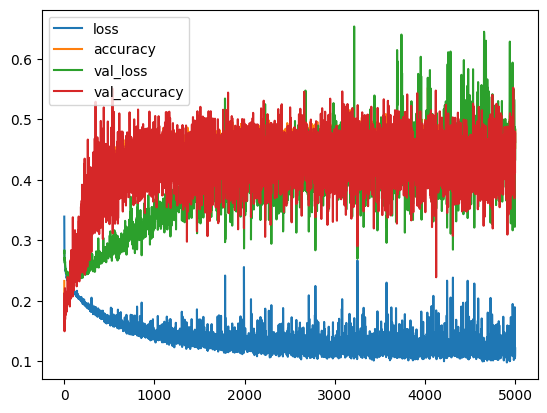

In [126]:
model_loss.plot()

In [127]:
model.save('car_game_model.h5')

In [1]:
import keras
model = keras.models.load_model('car_game_model.h5')

2022-08-29 20:20:45.207409: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-29 20:20:45.321030: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-08-29 20:20:45.321044: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-08-29 20:20:45.321873: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN

In [4]:
from car_game.car_game import CarGame
from car_game.road_enum import RoadEnum
    
car_game = CarGame(screen_size=(1600, 1200), car_speed=5, frame_rate=60,
                   road=RoadEnum.ONE, sensor_threshold=150, generate_train_data=False, nn_model=model)

car_game.start_game()


1/1 [==============================] - 0s 10ms/step
{'i_sensor_1': -1, 'i_sensor_2': 50, 'i_sensor_3': 43, 'i_sensor_4': 47, 'i_sensor_5': 37}
1/1 [==============================] - 0s 10ms/step
{'i_sensor_1': -1, 'i_sensor_2': 50, 'i_sensor_3': 44, 'i_sensor_4': 47, 'i_sensor_5': 38}
1/1 [==============================] - 0s 12ms/step
{'i_sensor_1': -1, 'i_sensor_2': 48, 'i_sensor_3': 46, 'i_sensor_4': 46, 'i_sensor_5': 38}
1/1 [==============================] - 0s 11ms/step
{'i_sensor_1': -1, 'i_sensor_2': 50, 'i_sensor_3': 44, 'i_sensor_4': 46, 'i_sensor_5': 39}
1/1 [==============================] - 0s 11ms/step
{'i_sensor_1': -1, 'i_sensor_2': 50, 'i_sensor_3': 45, 'i_sensor_4': 46, 'i_sensor_5': 39}
1/1 [==============================] - 0s 10ms/step
{'i_sensor_1': -1, 'i_sensor_2': 49, 'i_sensor_3': 46, 'i_sensor_4': 46, 'i_sensor_5': 39}
1/1 [==============================] - 0s 11ms/step
{'i_sensor_1': 138, 'i_sensor_2': 47, 'i_sensor_3': 51, 'i_sensor_4': 46, 'i_sensor_5': 40

1/1 [==============================] - 0s 11ms/step
{'i_sensor_1': -1, 'i_sensor_2': -1, 'i_sensor_3': 34, 'i_sensor_4': 70, 'i_sensor_5': 45}
1/1 [==============================] - 0s 10ms/step
{'i_sensor_1': -1, 'i_sensor_2': -1, 'i_sensor_3': 32, 'i_sensor_4': -1, 'i_sensor_5': 43}
1/1 [==============================] - 0s 11ms/step
{'i_sensor_1': -1, 'i_sensor_2': -1, 'i_sensor_3': 29, 'i_sensor_4': -1, 'i_sensor_5': 40}
1/1 [==============================] - 0s 11ms/step
{'i_sensor_1': 147, 'i_sensor_2': -1, 'i_sensor_3': 25, 'i_sensor_4': -1, 'i_sensor_5': 33}
1/1 [==============================] - 0s 11ms/step
{'i_sensor_1': 150, 'i_sensor_2': -1, 'i_sensor_3': 22, 'i_sensor_4': -1, 'i_sensor_5': 31}
1/1 [==============================] - 0s 11ms/step
{'i_sensor_1': 149, 'i_sensor_2': -1, 'i_sensor_3': 19, 'i_sensor_4': -1, 'i_sensor_5': 29}
1/1 [==============================] - 0s 11ms/step
{'i_sensor_1': 35, 'i_sensor_2': -1, 'i_sensor_3': 16, 'i_sensor_4': -1, 'i_sensor_5': 

1/1 [==============================] - 0s 11ms/step
{'i_sensor_1': -1, 'i_sensor_2': 64, 'i_sensor_3': 40, 'i_sensor_4': 54, 'i_sensor_5': 34}
1/1 [==============================] - 0s 10ms/step
{'i_sensor_1': -1, 'i_sensor_2': 64, 'i_sensor_3': 40, 'i_sensor_4': 54, 'i_sensor_5': 34}
1/1 [==============================] - 0s 11ms/step
{'i_sensor_1': -1, 'i_sensor_2': 64, 'i_sensor_3': 41, 'i_sensor_4': 54, 'i_sensor_5': 34}
1/1 [==============================] - 0s 11ms/step
{'i_sensor_1': -1, 'i_sensor_2': 60, 'i_sensor_3': 45, 'i_sensor_4': 54, 'i_sensor_5': 35}
1/1 [==============================] - 0s 11ms/step
{'i_sensor_1': -1, 'i_sensor_2': 59, 'i_sensor_3': 45, 'i_sensor_4': 53, 'i_sensor_5': 35}
1/1 [==============================] - 0s 10ms/step
{'i_sensor_1': -1, 'i_sensor_2': 62, 'i_sensor_3': 43, 'i_sensor_4': 52, 'i_sensor_5': 35}
1/1 [==============================] - 0s 11ms/step
{'i_sensor_1': -1, 'i_sensor_2': 68, 'i_sensor_3': 40, 'i_sensor_4': 53, 'i_sensor_5': 34}